# Term Deposit Prediction Data Set
### Predict Whether A Customer Will Subscribe Or Not
####  
### Data Science project from Kaggle: 
https://www.kaggle.com/brajeshmohapatra/term-deposit-prediction-data-set

#### 
### Task description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. 

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. 

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


### Load dataset

In [1]:
# import libraries for exploratory data analysis
import pandas as pd # data analysis
import numpy as np # linear algebra

# import libraries to visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder

In [2]:
# load dataset
train_data = pd.read_csv('dataset/train.csv')
X_test = pd.read_csv('dataset/test.csv')

In [3]:
X_train = train_data.drop(['subscribed'],axis=1)
y_train = train_data['subscribed']

In [4]:
y_test = pd.read_excel('dataset/solution_checker.xlsx',usecols=['actual value'],sheet_name='Sheet2')

In [5]:
# check the datasets
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [6]:
# columns of train data
X_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         31647 non-null  int64 
 1   age        31647 non-null  int64 
 2   job        31647 non-null  object
 3   marital    31647 non-null  object
 4   education  31647 non-null  object
 5   default    31647 non-null  object
 6   balance    31647 non-null  int64 
 7   housing    31647 non-null  object
 8   loan       31647 non-null  object
 9   contact    31647 non-null  object
 10  day        31647 non-null  int64 
 11  month      31647 non-null  object
 12  duration   31647 non-null  int64 
 13  campaign   31647 non-null  int64 
 14  pdays      31647 non-null  int64 
 15  previous   31647 non-null  int64 
 16  poutcome   31647 non-null  object
dtypes: int64(8), object(9)
memory usage: 4.1+ MB


### Data cleaning and feature engineering

### Handle Missing value

In [8]:
# number of missing values in each columns
X_train.isnull().sum().sort_values(ascending=False)

poutcome     0
housing      0
age          0
job          0
marital      0
education    0
default      0
balance      0
loan         0
previous     0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
ID           0
dtype: int64


### Categorical encoding

In [9]:
# check the data type of each columns
for col in X_train.columns:
    print(col,": ",X_train[col].dtype)

# make list of variables types

# numerical: discrete and continuous
discrete = [var for var in X_train.columns if X_train[var].dtype!='O'and X_train[var].nunique()<10]
continuous = [var for var in X_train.columns if X_train[var].dtype!='O'and var not in discrete]

# categorical
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']

print('\nThere are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

ID :  int64
age :  int64
job :  object
marital :  object
education :  object
default :  object
balance :  int64
housing :  object
loan :  object
contact :  object
day :  int64
month :  object
duration :  int64
campaign :  int64
pdays :  int64
previous :  int64
poutcome :  object

There are 0 discrete variables
There are 8 continuous variables
There are 9 categorical variables


['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


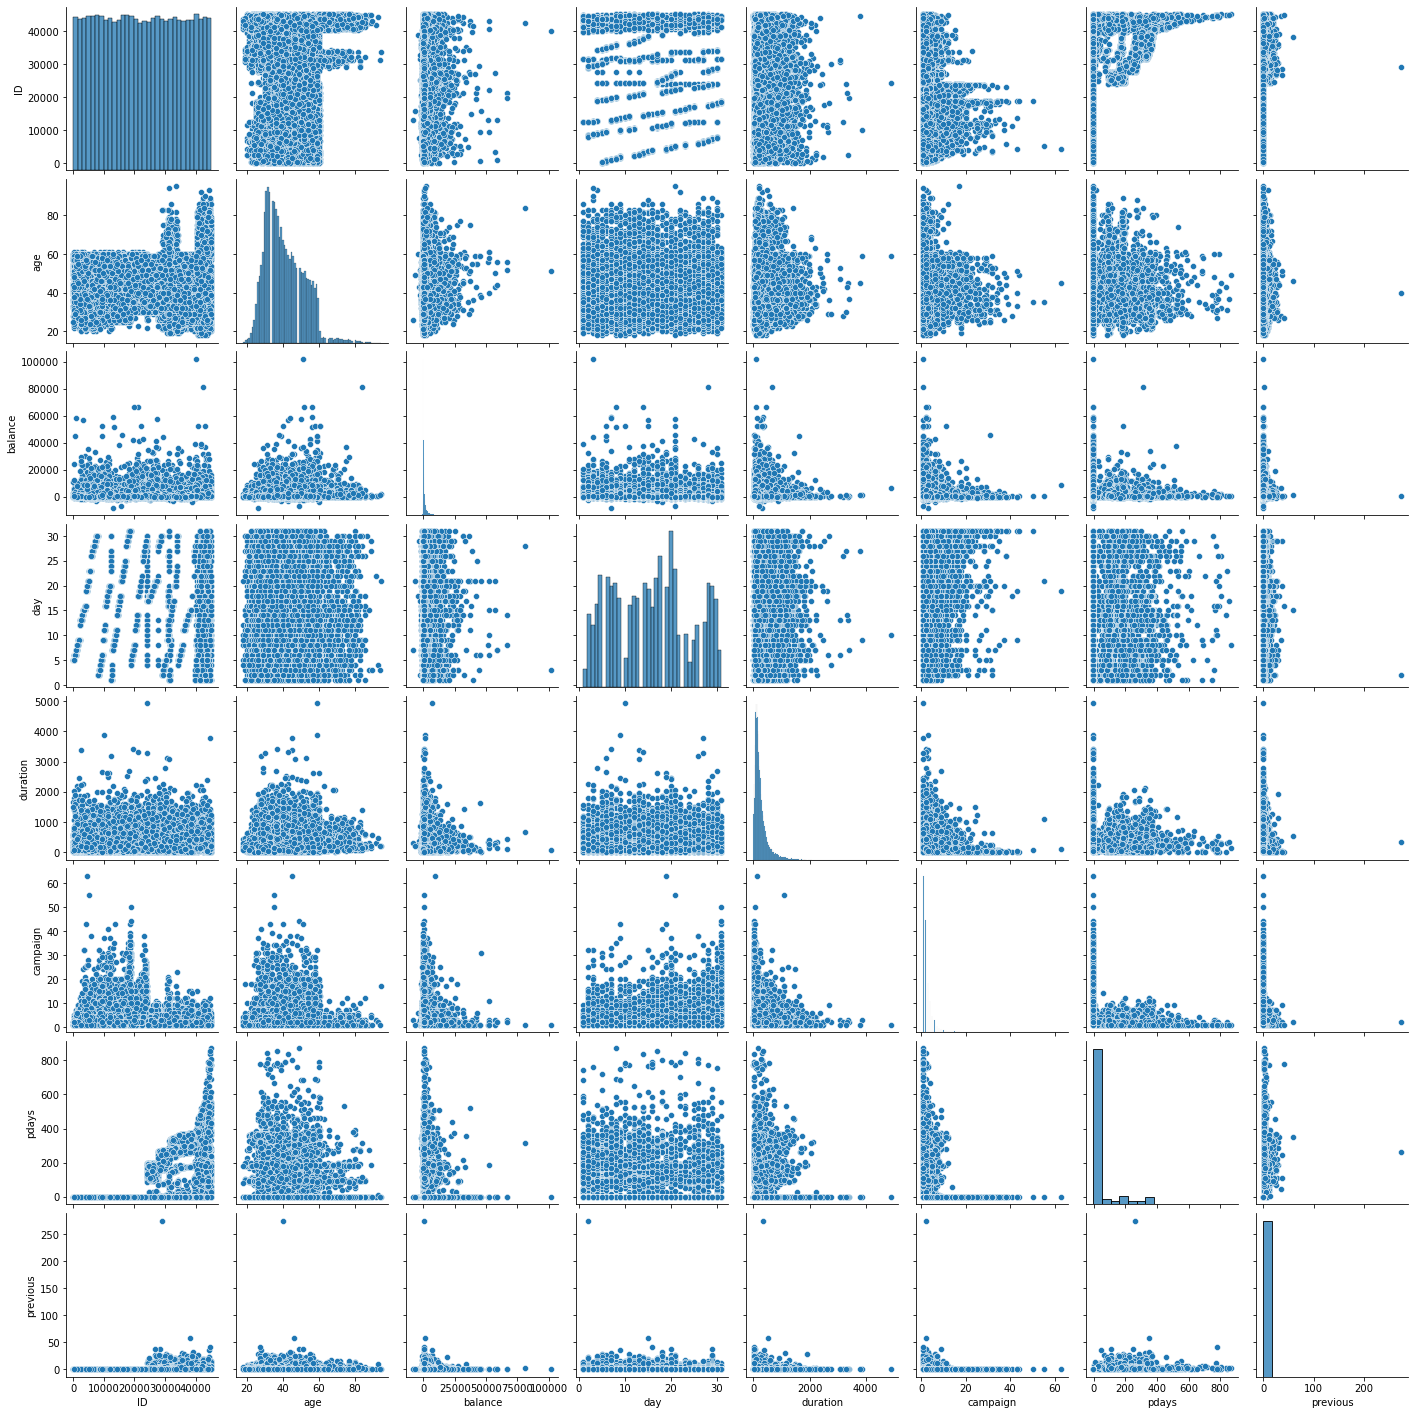

In [10]:
# plot all continuous variable
print(continuous)
sns.pairplot(data=X_train[continuous])

In [11]:
# In this section we handle categorical variables
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
# show the cardinality of each category
X_train[categorical].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [13]:
# check all categories in each categorical variables
for col in categorical:
    print(col,':\n',X_train[col].value_counts(),'\n')

job :
 blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

marital :
 married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

education :
 secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

default :
 no     31062
yes      585
Name: default, dtype: int64 

housing :
 yes    17584
no     14063
Name: housing, dtype: int64 

loan :
 no     26516
yes     5131
Name: loan, dtype: int64 

contact :
 cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64 

month :
 may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64 

poutcome :
 u

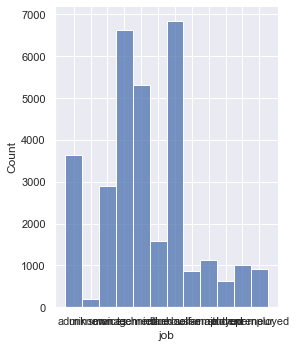

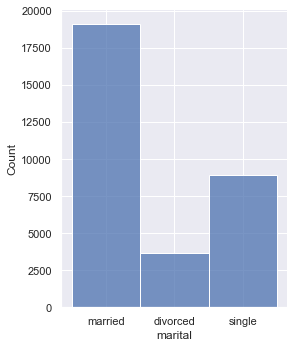

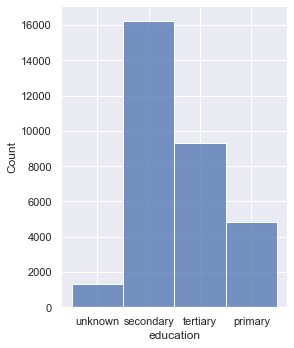

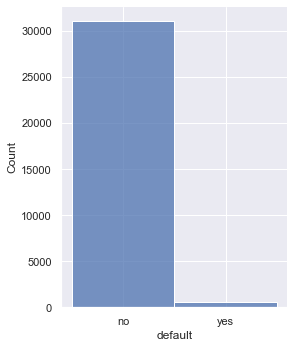

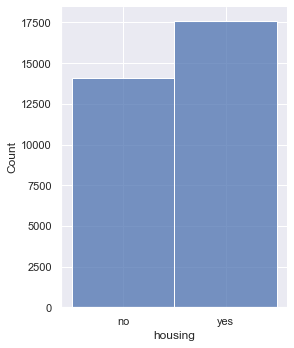

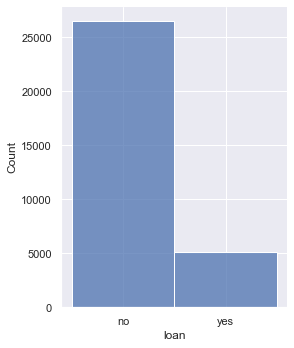

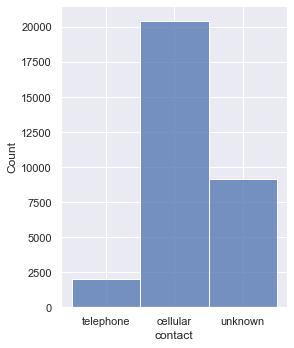

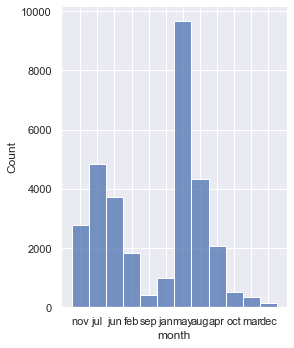

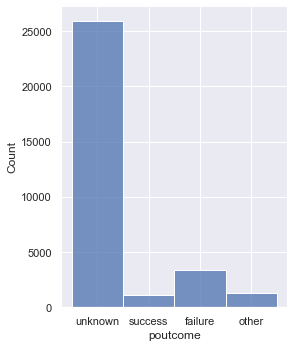

In [14]:
sns.set(style="darkgrid")
for col in categorical:
    sns.displot(x=X_train[col],aspect=0.85)

In [15]:
# encode features with yes and no variables into binary variables
mapping = {"yes":1,"no":0}
y_train = y_train.map(mapping)
y_test['actual value'] = y_test['actual value'].map(mapping)
X_train['default'] = X_train['default'].map(mapping)
X_train['housing'] = X_train['housing'].map(mapping)
X_train['loan'] = X_train['loan'].map(mapping)

In [16]:
X_test['default'] = X_test['default'].map(mapping)
X_test['housing'] = X_test['housing'].map(mapping)
X_test['loan'] = X_test['loan'].map(mapping)

In [17]:
month_mapping = {'nov':11,'jul':7, 'jun': 6, 'feb':2, 
                 'sep':9, 'jan':1, 'may':5, 'aug':8,
                 'apr':4 ,'oct':10, 'mar':3, 'dec':12}
X_train['month'] = X_train['month'].map(month_mapping)

In [18]:
X_test['month'] = X_test['month'].map(month_mapping)

In [19]:
for col in categorical:
    print(col,": ",X_train[col].unique())

job :  ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital :  ['married' 'divorced' 'single']
education :  ['unknown' 'secondary' 'tertiary' 'primary']
default :  [0 1]
housing :  [0 1]
loan :  [0 1]
contact :  ['telephone' 'cellular' 'unknown']
month :  [11  7  6  2  9  1  5  8  4 10  3 12]
poutcome :  ['unknown' 'success' 'failure' 'other']


In [20]:
# encode the category job
fre_enc = CountFrequencyEncoder(
    encoding_method='frequency', 
    variables=['job'])

fre_enc.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency', variables=['job'])

In [21]:
# observations per category for each variable
fre_enc.encoder_dict_

{'job': {'blue-collar': 0.21619742787626,
  'management': 0.2097829178121149,
  'technician': 0.16769362024836476,
  'admin.': 0.114734414004487,
  'services': 0.09173065377444939,
  'retired': 0.04973615192593295,
  'self-employed': 0.03548519606913768,
  'entrepreneur': 0.03185136031851361,
  'unemployed': 0.028596707428824218,
  'housemaid': 0.027617151704742944,
  'student': 0.020065093057793786,
  'unknown': 0.006509305779378772}}

In [22]:
X_train = fre_enc.transform(X_train)
X_test = fre_enc.transform(X_test)

In [23]:
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0.114734,married,unknown,0,1933,0,0,telephone,19,11,44,2,-1,0,unknown
1,40576,31,0.006509,married,secondary,0,3,0,0,cellular,20,7,91,2,-1,0,unknown
2,15320,27,0.091731,married,secondary,0,891,1,0,cellular,18,7,240,1,-1,0,unknown
3,43962,57,0.209783,divorced,tertiary,0,3287,0,0,cellular,22,6,867,1,84,3,success
4,29842,31,0.167694,married,secondary,0,119,1,0,cellular,4,2,380,1,-1,0,unknown


In [24]:
# to encode rest categorical variables
from sklearn.preprocessing import OneHotEncoder

tran_feature = ['marital','contact','poutcome','education']
encoder = OneHotEncoder(categories='auto',drop='first',sparse=False)

encoder.fit(X_train[tran_feature])

OneHotEncoder(drop='first', sparse=False)

In [25]:
encoder.categories_

[array(['divorced', 'married', 'single'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)]

In [26]:
# transform the train set and test set

train_temp = encoder.transform(X_train[tran_feature])
test_temp = encoder.transform(X_test[tran_feature])

In [27]:
encoder.get_feature_names()

array(['x0_married', 'x0_single', 'x1_telephone', 'x1_unknown',
       'x2_other', 'x2_success', 'x2_unknown', 'x3_secondary',
       'x3_tertiary', 'x3_unknown'], dtype=object)

In [28]:
X_train[encoder.get_feature_names()] = pd.DataFrame(train_temp,columns=encoder.get_feature_names())
X_test[encoder.get_feature_names()] = pd.DataFrame(test_temp,columns=encoder.get_feature_names())

X_train.drop(labels=tran_feature,axis=1,inplace=True)
X_test.drop(labels=tran_feature,axis=1,inplace=True)

In [29]:
# feature ID is not useful for algorithm
X_train.drop(labels='ID',axis=1,inplace=True)
X_test.drop(labels='ID',axis=1,inplace=True)

In [30]:
# check the dataset
X_train.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,x0_married,x0_single,x1_telephone,x1_unknown,x2_other,x2_success,x2_unknown,x3_secondary,x3_tertiary,x3_unknown
0,56,0.114734,0,1933,0,0,19,11,44,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,31,0.006509,0,3,0,0,20,7,91,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,27,0.091731,0,891,1,0,18,7,240,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,57,0.209783,0,3287,0,0,22,6,867,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,31,0.167694,0,119,1,0,4,2,380,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<AxesSubplot:xlabel='age'>

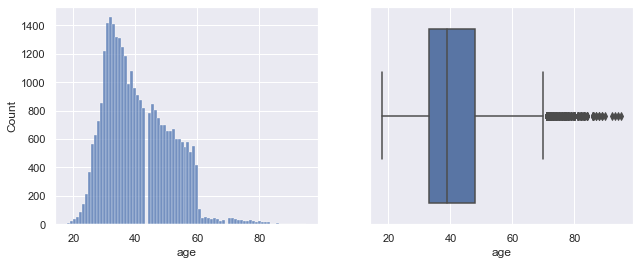

In [31]:
# show the distribution of columns age
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(x='age',data=X_train,bins=80)
plt.subplot(1, 3, 2)
sns.boxplot(x='age',data=X_train)

<AxesSubplot:xlabel='duration'>

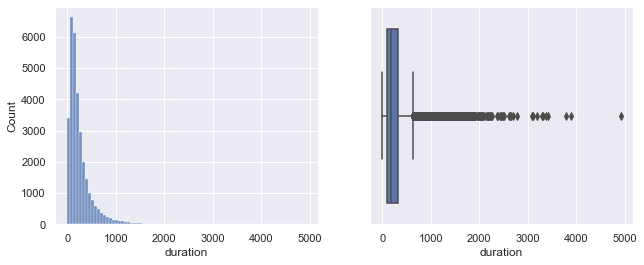

In [32]:
# show the distribution of columns balance
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(x='duration',data=X_train,bins=80)
plt.subplot(1, 3, 2)
sns.boxplot(x='duration',data=X_train)

<AxesSubplot:xlabel='balance', ylabel='Count'>

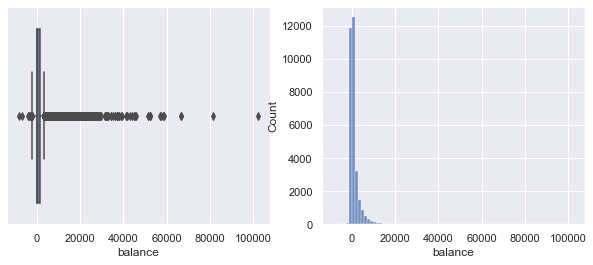

In [33]:
# show the distribution of column balance
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='balance',data=X_train)
plt.subplot(1, 3, 2)
sns.histplot(x='balance',data=X_train,bins=80)

In [34]:
# handle the outliers in this column
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(
    capping_method='gaussian',tail='right',      
    fold=3,variables=['balance', 'duration','age']
)

windsoriser.fit(X_train)

Winsorizer(variables=['balance', 'duration', 'age'])

In [35]:
X_train = windsoriser.transform(X_train)
X_test = windsoriser.transform(X_test)

<AxesSubplot:xlabel='balance', ylabel='Count'>

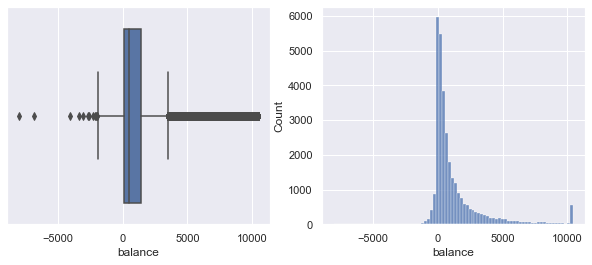

In [36]:
# check the changed features
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='balance',data=X_train)
plt.subplot(1, 3, 2)
sns.histplot(x='balance',data=X_train,bins=80)

<AxesSubplot:xlabel='balance', ylabel='Count'>

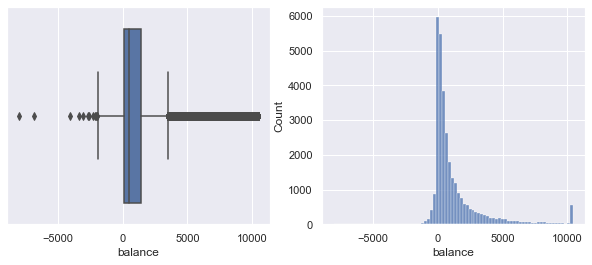

In [37]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='balance',data=X_train)
plt.subplot(1, 3, 2)
sns.histplot(x='balance',data=X_train,bins=80)

<AxesSubplot:xlabel='age'>

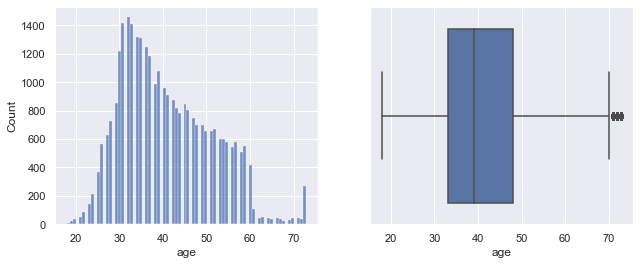

In [38]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(x='age',data=X_train,bins=80)
plt.subplot(1, 3, 2)
sns.boxplot(x='age',data=X_train)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

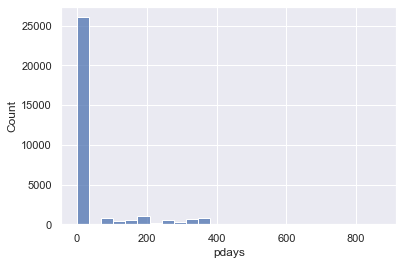

In [39]:
# check the feature pdays
sns.histplot(X_train['pdays'],bins=25)

In [40]:
X_train['pdays'].nunique()

509

In [41]:
# encode this feature
from feature_engine.discretisation import EqualWidthDiscretiser

disc = EqualWidthDiscretiser(bins=7, variables = ['pdays'])

disc.fit(X_train)

EqualWidthDiscretiser(bins=7, variables=['pdays'])

In [42]:
disc.binner_dict_

{'pdays': [-inf,
  123.57142857142857,
  248.14285714285714,
  372.7142857142857,
  497.2857142857143,
  621.8571428571429,
  746.4285714285714,
  inf]}

In [43]:
# transform the dataset
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

### Feature Selection with feature engine

In [44]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features) # there are no constant features

[]


In [45]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [46]:
# print the number of quasi-constant features

quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant)

1

In [47]:
# show the percentage of quasi-constant values
for feature in quasi_constant:
    print(feature, '\n', X_train[feature].value_counts()/np.float(len(X_train)),'\n')

job 
 0.216197    0.216197
0.209783    0.209783
0.167694    0.167694
0.114734    0.114734
0.091731    0.091731
0.049736    0.049736
0.035485    0.035485
0.031851    0.031851
0.028597    0.028597
0.027617    0.027617
0.020065    0.020065
0.006509    0.006509
Name: job, dtype: float64 



In [48]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20


0

In [49]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

correlated features:  0


((31647, 22), (13564, 22))

In [50]:
X_train

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,x0_married,x0_single,x1_telephone,x1_unknown,x2_other,x2_success,x2_unknown,x3_secondary,x3_tertiary,x3_unknown
0,56.0,0.114734,0,1933.0,0,0,19,11,44.000000,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,31.0,0.006509,0,3.0,0,0,20,7,91.000000,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,27.0,0.091731,0,891.0,1,0,18,7,240.000000,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,57.0,0.209783,0,3287.0,0,0,22,6,867.000000,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,31.0,0.167694,0,119.0,1,0,4,2,380.000000,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29.0,0.209783,0,0.0,1,0,12,5,116.000000,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
31643,53.0,0.209783,0,380.0,0,1,5,6,438.000000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
31644,32.0,0.209783,0,312.0,0,0,7,8,37.000000,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
31645,57.0,0.167694,0,225.0,1,0,15,5,22.000000,7,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           31647 non-null  float64
 1   job           31647 non-null  float64
 2   default       31647 non-null  int64  
 3   balance       31647 non-null  float64
 4   housing       31647 non-null  int64  
 5   loan          31647 non-null  int64  
 6   day           31647 non-null  int64  
 7   month         31647 non-null  int64  
 8   duration      31647 non-null  float64
 9   campaign      31647 non-null  int64  
 10  pdays         31647 non-null  int64  
 11  previous      31647 non-null  int64  
 12  x0_married    31647 non-null  float64
 13  x0_single     31647 non-null  float64
 14  x1_telephone  31647 non-null  float64
 15  x1_unknown    31647 non-null  float64
 16  x2_other      31647 non-null  float64
 17  x2_success    31647 non-null  float64
 18  x2_unknown    31647 non-nu

### Data preprocessing

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model building

In [53]:
# import machine learning algorithm model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
# train the model
KNN = KNeighborsClassifier(n_neighbors=7)
rfc = RandomForestClassifier(n_estimators=200)
LR = LogisticRegression()
dtree = DecisionTreeClassifier()
svm = SVC(C=10,gamma=0.01)

In [55]:
model_list = [rfc,LR,dtree,svm,KNN]

In [56]:
# evaluate the algorithm we just build
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

for model in model_list:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(model)
    print(confusion_matrix(y_test,pred),'\n')
    print(classification_report(y_test,pred))
    print(roc_auc_score(y_test,pred),'\n')

RandomForestClassifier(n_estimators=200)
[[11682   308]
 [  962   612]] 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11990
           1       0.67      0.39      0.49      1574

    accuracy                           0.91     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.91      0.90     13564

0.681565111968572 

LogisticRegression()
[[11665   325]
 [ 1002   572]] 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11990
           1       0.64      0.36      0.46      1574

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564

0.6681497075601968 

DecisionTreeClassifier()
[[11063   927]
 [  822   752]] 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11990
          